Initial Guess:  [0, 0]
Function Value:  3.947982108863602e-06 at x =  [0.99802208 0.99600576] in 248 iterations
For Tolerence Value:  1e-07


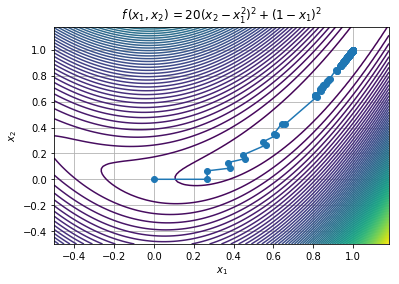

In [9]:
#Numerical Opptimization of Rosenbrock Function
#Using Gradient Descent Algorithm 
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as lp
%matplotlib inline

#Function to calculate Gradient of given function
#Using Forward Difference Method
def grad(x):                    
    value = np.zeros(len(x))    
    xd = x.copy()
    h = 10**-6
    for j in range(len(x)):
        xd[j] = x[j] + h
        value[j] = (func(xd) - func(x))/h
        xd = x.copy()
    return value
 
#Function for calculating Function Value 
def func(x):                     
    return 20*(x[1] - x[0]**2)**2 + (1 - x[0])**2

#Step_size calcualtion for each iteration
#Using Back-Tracking line search method 
def step_size(x):                 
    alpha = 1                    
    beta = 0.8
    while func(x - alpha*grad(x)) > (func(x) - 0.5*alpha*lp.norm(grad(x))**2):
        alpha *= beta
    return alpha
    
x = [0, 0] #initialization for the iterations
x1 = np.array([])
x2 = np.array([])
tol = 10**-7 #Tolerence Value to stop the iteration loop 
pre = -100
k = 0        
print("Initial Guess: ", x)

#Gradient-Descent Algorithm
while abs(func(x) - pre) > tol:
    pre = func(x)
    x1 = np.append(x1, x[0])
    x2 = np.append(x2, x[1])
    alpha = step_size(x)
    x -= alpha*grad(x)  #Gradient-Descent Algorithm
    k += 1
    
print("Function Value: ", func(x), "at x = ", x, "in", k, "iterations")
print("For Tolerence Value: ", tol)

#Contour Plots
fig = plt.figure()
x = np.arange(-0.5, 1.2, 0.02)
y = np.arange(-0.5, 1.2, 0.02)
X, Y = np.meshgrid(x, y)
Z = 20*(Y - X**2)**2 + (1 - X)**2
plt.contour(X, Y, Z, 100)
plt.plot(x1, x2, 'o-')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("$f\,(x_1, x_2) \,= 20(x_2 - x_1^2)^2 + (1 - x_1)^2 $")
fig.savefig("Gradient_Descent.png", dpi = 1000)
plt.grid(True)